Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

Providing data for histograms with the use od dictionary type

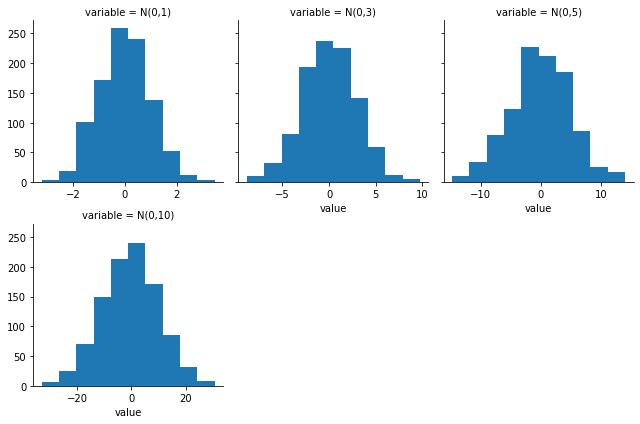

In [2]:
dictionary = {'N(0,1)':np.random.normal(0,1,1000),
             'N(0,3)':np.random.normal(0,3,1000),
             'N(0,5)':np.random.normal(0,5,1000),
             'N(0,10)':np.random.normal(0,10,1000)}
df = pd.DataFrame(dictionary)
df = df.melt()
g = sns.FacetGrid(df, col="variable", col_wrap=3, sharex=False)
g.map(plt.hist, "value")

Got plots for normal distribution with sample parameters

Providing data for logit distribution

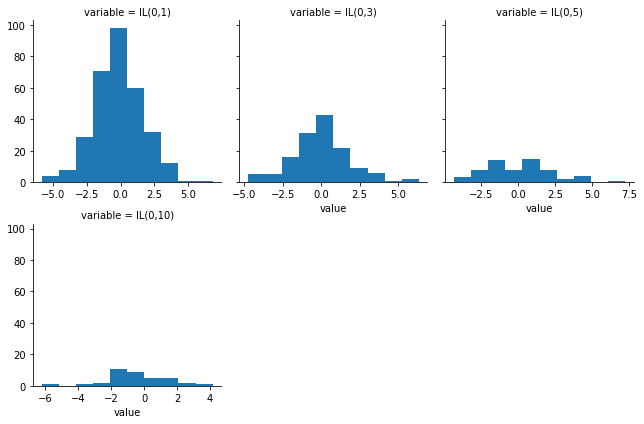

In [3]:
dictionary = {'IL(0,1)':sp.special.logit(np.random.normal(0,1,1000)),
             'IL(0,3)':sp.special.logit(np.random.normal(0,3,1000)),
             'IL(0,5)':sp.special.logit(np.random.normal(0,5,1000)),
             'IL(0,10)':sp.special.logit(np.random.normal(0,10,1000))}
df = pd.DataFrame(dictionary)
df = df.melt()
g = sns.FacetGrid(df, col="variable", col_wrap=3, sharex=False)
g.map(plt.hist, "value")

As we can see when moving the variance of logit distribution we do also 'flatten' the histograms and move it more to chosen side of the x axis.

Defining function for printing dictionaries

In [4]:
def print_grid(dictionary, bins = 10, cumulative = False):
    df = pd.DataFrame(dictionary)
    df = df.melt()
    g = sns.FacetGrid(df, col="variable", col_wrap=3, sharex=True)
    g.map(plt.hist, "value", bins = bins, cumulative = cumulative)

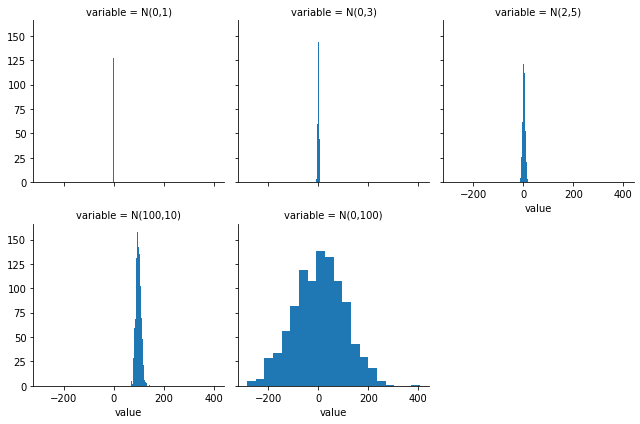

In [5]:
normal = {'N(0,1)':np.random.normal(0,1,1000),
             'N(0,3)':np.random.normal(0,3,1000),
             'N(2,5)':np.random.normal(2,5,1000),
             'N(100,10)':np.random.normal(100,10,1000),
         'N(0,100)':np.random.normal(0,100,1000)}
print_grid(normal, 20, False)

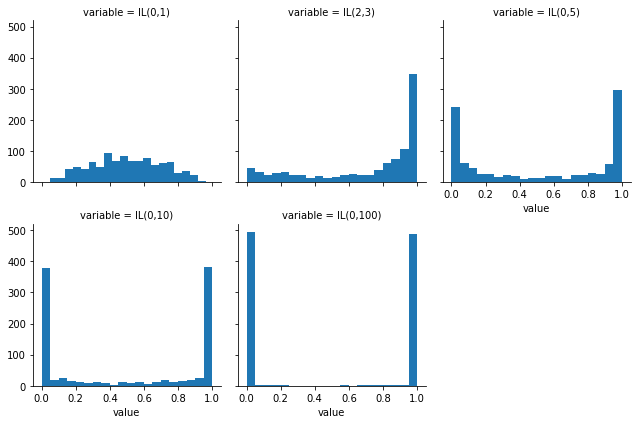

In [6]:
inverse_logit = {'IL(0,1)':sp.special.expit(np.random.normal(0,1,1000)),
             'IL(2,3)':sp.special.expit(np.random.normal(2,3,1000)),
             'IL(0,5)':sp.special.expit(np.random.normal(0,5,1000)),
             'IL(0,10)':sp.special.expit(np.random.normal(0,10,1000)),
            'IL(0,100)':sp.special.expit(np.random.normal(0,100,1000))}
print_grid(inverse_logit, 20, False)

Observing the boundaries effect for inverse logit distribution when the variance is increased. The most probable values tend to set on opposite sides of axis.

Providing data for Poisson distribution

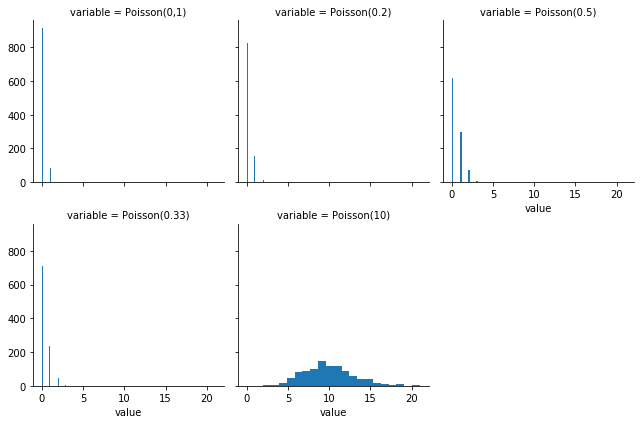

In [6]:
poisson = {'Poisson(0,1)':np.random.poisson(0.1,1000),
             'Poisson(0.2)':np.random.poisson(0.2,1000),
             'Poisson(0.5)':np.random.poisson(0.5,1000),
             'Poisson(0.33)':np.random.poisson(0.33,1000),
            'Poisson(10)':np.random.poisson(10,1000)}
print_grid(poisson, 20, False)

As we can see the increasing of $\lambda$ value for Poisson distribution makes the distribution more similar to the normal distribution (with regard that the Poisson distribution is limited to positive values).

Providing data for beta distribution

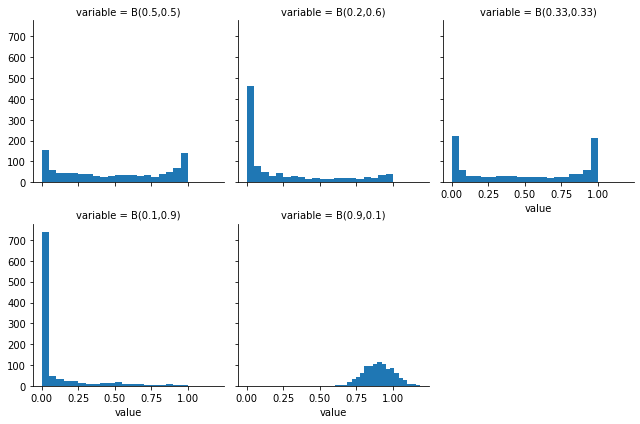

In [7]:
beta = {'B(0.5,0.5)':np.random.beta(0.5,0.5,1000),
             'B(0.2,0.6)':np.random.beta(0.2,0.6,1000),
             'B(0.33,0.33)':np.random.beta(0.33,0.33,1000),
             'B(0.1,0.9)':np.random.beta(0.1,0.9,1000),
         'B(0.9,0.1)':np.random.normal(0.9,0.1,1000)}
print_grid(beta, 20, False)

Observing the boundaries effects of sample parameters passed to the beta distribution function. The more we increase beta parameter the more it changes from 'one sided' distribution to normal-like distribution.

Defining function for location and dispersion calculation

In [8]:
def location(alpha, beta):
    return alpha / (alpha + beta)

def dispersion(alpha, beta):
    temp = location(alpha, beta)
    return temp * (1 - temp) * (1/(alpha + beta + 1))

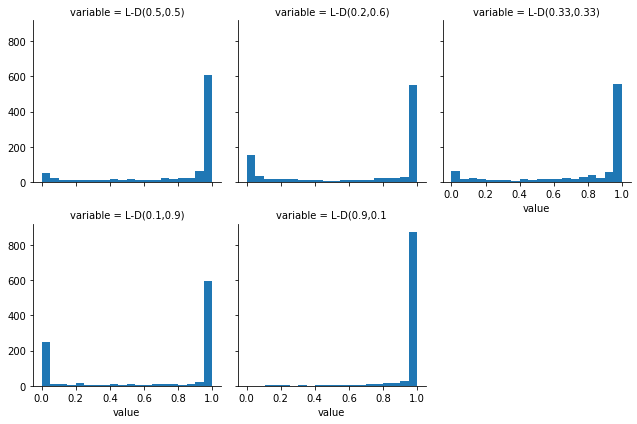

In [9]:
loc_disper = {
    'L-D(0.5,0.5)':np.random.beta(location(0.5, 0.5), dispersion(0.5, 0.5), 1000),
    'L-D(0.2,0.6)':np.random.beta(location(0.2, 0.6), dispersion(0.2, 0.6), 1000),
    'L-D(0.33,0.33)':np.random.beta(location(0.33, 0.33), dispersion(0.33, 0.33), 1000),
    'L-D(0.1,0.9)':np.random.beta(location(0.1, 0.9), dispersion(0.1, 0.9), 1000),
    'L-D(0.9,0.1':np.random.beta(location(0.9, 0.1), dispersion(0.9, 0.1), 1000)
}
print_grid(loc_disper, 20, False)

To sum up, after observing the behavior of some sample distributions, we can clearly see the effects of parameters that were passed to functions. Some distributions (like Beta, inverse logit) tend to show boundaries effects with probabilites cummulating either at two opposite sides of probability or at one chosen side